# **Diabetes Prediction using Random Forest and SVM**

## Project Overview

This project aims to predict whether patients have diabetes based on medical features. We use two machine learning algorithms, **Random Forest Classifier** and **Support Vector Machine (SVM)**, and compare their performance.

## Dataset Information
The dataset used is the **Pima Indians Diabetes Database**.

**Source:** [Kaggle Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

**Features included:**
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (target variable)


# **Import and Install all the necessary packages**

In [43]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [44]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

# Features (all columns except 'Outcome')
X = data.drop('Outcome', axis=1)

# Target variable ('Outcome' column)
y = data['Outcome']

# **Split Data into Training and Testing Sets**

In [46]:
# Split data (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print(f'Training Set: {X_train.shape}')
print(f'Testing Set: {X_test.shape}')

Training Set: (614, 8)
Testing Set: (154, 8)


# **Random Forest Classifier**

In [47]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using training data
rf_model.fit(X_train, y_train)

# Predict outcomes using test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {rf_accuracy*100:.2f}%")

Random Forest accuracy: 72.08%


# **Support Vector Machine (SVM)**

In [48]:
# Create SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train SVM model
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM accuracy: {svm_accuracy*100:.2f}%")

SVM accuracy: 75.32%


# **Model Comparison**

<ipython-input-49-97a11678d7a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


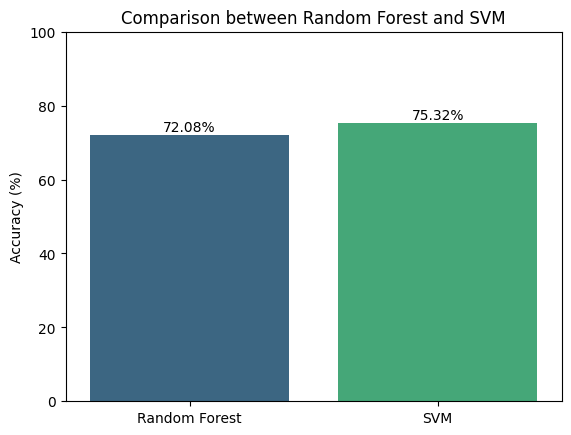

In [49]:
# Plot accuracy comparison
models = ['Random Forest', 'SVM']
accuracies = [rf_accuracy*100, svm_accuracy*100]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.title('Comparison between Random Forest and SVM')

# Display accuracy on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

# **Interactive Prediction Interface**

In [52]:
# Dropdown widget to select the model
model_selector = widgets.Dropdown(
    options=['Random Forest', 'SVM'],
    description='Model:',
)

# Creating input sliders
pregnancies = widgets.IntSlider(min=0, max=10, description='Pregnancies:')
glucose = widgets.IntSlider(min=50, max=200, description='Glucose:')
blood_pressure = widgets.IntSlider(min=30, max=120, description='BloodPressure:')
skin_thickness = widgets.IntSlider(min=0, max=100, description='SkinThickness:')
insulin = widgets.IntSlider(min=0, max=300, description='Insulin:')
bmi = widgets.FloatSlider(min=10, max=50, description='BMI:')
pedigree = widgets.FloatSlider(min=0, max=2, step=0.01, description='Pedigree:')
age = widgets.IntSlider(min=15, max=100, description='Age:')

button = widgets.Button(description="Predict")
output = widgets.Output()

# Prediction function
def on_button_clicked(b):
    with output:
        clear_output()
        columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

        new_patient = pd.DataFrame([[
            pregnancies.value, glucose.value, blood_pressure.value,
            skin_thickness.value, insulin.value, bmi.value,
            pedigree.value, age.value
        ]], columns=columns)

        # Choose model based on selection
        if model_selector.value == 'Random Forest':
            prediction = rf_model.predict(new_patient)
        else:
            prediction = svm_model.predict(new_patient)

        # Display prediction result
        if prediction[0] == 1:
            print(f"⚠️ [{model_selector.value}] Patient at risk for diabetes!")
        else:
            print(f"✅ [{model_selector.value}] Patient is not at risk for diabetes.")

button.on_click(on_button_clicked)

# Display widgets including model selector
display(model_selector, pregnancies, glucose, blood_pressure, skin_thickness,
        insulin, bmi, pedigree, age, button, output)

Dropdown(description='Model:', options=('Random Forest', 'SVM'), value='Random Forest')

IntSlider(value=0, description='Pregnancies:', max=10)

IntSlider(value=50, description='Glucose:', max=200, min=50)

IntSlider(value=30, description='BloodPressure:', max=120, min=30)

IntSlider(value=0, description='SkinThickness:')

IntSlider(value=0, description='Insulin:', max=300)

FloatSlider(value=10.0, description='BMI:', max=50.0, min=10.0)

FloatSlider(value=0.0, description='Pedigree:', max=2.0, step=0.01)

IntSlider(value=15, description='Age:', min=15)

Button(description='Predict', style=ButtonStyle())

Output()